<a href="https://colab.research.google.com/github/KCY132/HW/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.데이터 loading


In [28]:
import pandas as pd


# pandas로 파일 불러오기
df = pd.read_csv('/content/Social_Network_Ads.csv')

# 데이터 내용 확인
print(df.head())
print(df.columns)


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


2.데이터 전처리,feature추출


In [29]:
# X는 특징값 (입력), y는 정답 (출력)
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values.reshape(-1, 1)


 3. 데이터 분할 (train/test 나누기)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 정규화 도구 생성
scaler = StandardScaler()

# X 정규화 수행
X_scaled = scaler.fit_transform(X)

# 정규화된 X_scaled로 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


4.학습데이터에 대해 로지스틱회귀 모델 구성

In [31]:
import numpy as np

# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 교차 엔트로피 오차 함수 (cost)
def compute_cost(X, y, weights):
    m = X.shape[0]
    z = X @ weights
    h = sigmoid(z)
    epsilon = 1e-5  # log(0) 방지용 작은 수
    cost = (-1/m) * (y.T @ np.log(h + epsilon) + (1 - y).T @ np.log(1 - h + epsilon))
    return cost.item()

# 입력 벡터에 bias 항 (1) 추가하는 함수
def add_bias(X):
    m = X.shape[0]
    return np.hstack([np.ones((m, 1)), X])



5.경사하강법을 이용해서 모델 학습하고, 파라미터 값 출력 print(w0, w1
, w2
)

In [33]:
# 경사하강법 함수
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    X_b = add_bias(X)  # bias 항 추가
    m, n = X_b.shape
    weights = np.zeros((n, 1))  # 초기 가중치 0으로

    for epoch in range(epochs):
        z = X_b @ weights
        h = sigmoid(z)
        gradient = (1/m) * (X_b.T @ (h - y))
        weights -= learning_rate * gradient

        # 100번마다 cost 출력
        if epoch % 100 == 0:
            cost = compute_cost(X_b, y, weights)
            print(f"Epoch {epoch}, Cost: {cost:.4f}")

    return weights
# 모델 학습 실행
weights = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000)

# 학습된 파라미터 출력
w0, w1, w2 = weights.flatten()
print(f"학습된 파라미터:\nw0 = {w0:.4f}, w1 = {w1:.4f}, w2 = {w2:.4f}")



Epoch 0, Cost: 0.6919
Epoch 100, Cost: 0.5943
Epoch 200, Cost: 0.5351
Epoch 300, Cost: 0.4969
Epoch 400, Cost: 0.4709
Epoch 500, Cost: 0.4523
Epoch 600, Cost: 0.4385
Epoch 700, Cost: 0.4279
Epoch 800, Cost: 0.4196
Epoch 900, Cost: 0.4129
학습된 파라미터:
w0 = -0.6345, w1 = 1.1834, w2 = 0.7032


6. 모델의 시각화

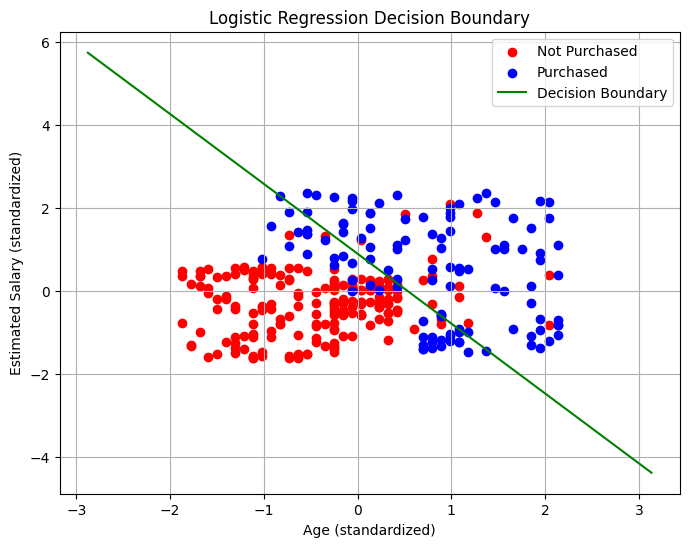

In [34]:
import matplotlib.pyplot as plt

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, weights):
    X_b = add_bias(X)

    # x축 값 만들기
    x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)

    # 결정 경계 계산 (w0 + w1*x1 + w2*x2 = 0 → x2 = -(w0 + w1*x1)/w2)
    x2 = -(weights[0] + weights[1] * x1) / weights[2]

    plt.figure(figsize=(8, 6))

    # 클래스 0과 1 구분해서 그리기
    plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], c='red', label='Not Purchased')
    plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], c='blue', label='Purchased')

    # 결정 경계 선
    plt.plot(x1, x2, color='green', label='Decision Boundary')

    plt.xlabel('Age (standardized)')
    plt.ylabel('Estimated Salary (standardized)')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

# 시각화 실행 (훈련 데이터 기준)
plot_decision_boundary(X_train, y_train, weights)


7.scikit-learn Library를 이용, 모델 학습하고, 파라미터 값 출력 print(w0, w1
, w2
)

In [35]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 만들고 학습시키기
model = LogisticRegression()
model.fit(X_train, y_train.ravel())  # y는 1D array여야 하니까 ravel()

# 파라미터 출력 (bias 포함)
w0 = model.intercept_[0]
w1, w2 = model.coef_[0]

print(f"scikit-learn 모델 파라미터:")
print(f"w0 = {w0:.4f}, w1 = {w1:.4f}, w2 = {w2:.4f}")


scikit-learn 모델 파라미터:
w0 = -1.0529, w1 = 2.0125, w2 = 1.1232


8. 모델의 시각화

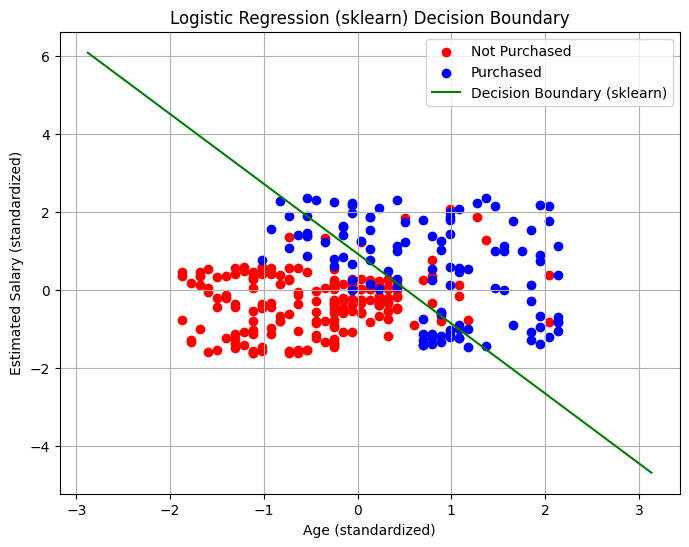

In [36]:
# sklearn 모델 시각화
def plot_sklearn_decision_boundary(X, y, model):
    x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    # 결정 경계 계산 (w0 + w1*x1 + w2*x2 = 0 → x2 = -(w0 + w1*x1)/w2)
    w0 = model.intercept_[0]
    w1, w2 = model.coef_[0]
    x2 = -(w0 + w1 * x1) / w2

    plt.figure(figsize=(8, 6))
    plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], c='red', label='Not Purchased')
    plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], c='blue', label='Purchased')
    plt.plot(x1, x2, color='green', label='Decision Boundary (sklearn)')

    plt.xlabel('Age (standardized)')
    plt.ylabel('Estimated Salary (standardized)')
    plt.title('Logistic Regression (sklearn) Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

# 실행
plot_sklearn_decision_boundary(X_train, y_train, model)
